In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
import plotly.io as pio
pio.renderers.default = "notebook"

# Exploratory Data Analysis

## Loading Data

In [11]:
trips = []
for i in range(1, 25):
    trips.append(pd.read_pickle(f'data/trips_combined_boston/{i}.pkl'))
combined_trips = pd.concat(trips)
combined_trips

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
0,413,2015-01-01 16:19:32,2015-01-01 16:26:26,143.0,EF - North Point Park,42.369885,-71.069957,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,481.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,575,2015-01-02 08:06:49,2015-01-02 08:16:25,90.0,Lechmere Station at Cambridge St / First St,42.370677,-71.076529,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,1295.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,886,2015-01-02 11:38:38,2015-01-02 11:53:24,95.0,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,652.0,casual,1992,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1027,2015-01-02 13:33:05,2015-01-02 13:50:12,91.0,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,1094.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,383,2015-01-05 10:15:46,2015-01-05 10:22:09,143.0,EF - North Point Park,42.369885,-71.069957,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,761.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616979,312,2024-01-12 15:38:53,2024-01-12 15:44:05,NaN,Charlestown Navy Yard,42.374125,-71.054812,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,BA5F71F2B4F60857,classic_bike,D32039,D32038,member
11616980,1926,2024-01-13 12:10:36,2024-01-13 12:42:42,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,C77DAA204E19EF6A,classic_bike,C32022,S32036,member
11616981,2214,2024-01-27 12:08:39,2024-01-27 12:45:33,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,77BC9B9BCAD3EBA6,classic_bike,C32022,S32036,member
11616982,457,2024-01-23 19:13:05,2024-01-23 19:20:42,NaN,Aquarium T Stop - 200 Atlantic Ave,42.360479,-71.050593,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,C24A84547C47B792,electric_bike,B32004,D32038,member


## Trips with Same Start and End Station

In [12]:
same_start_and_end = combined_trips.loc[combined_trips['start_station_name'] == combined_trips['end_station_name']]
same_start_and_end
# check missingness, differences between station ID and name

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
57,1758,2015-04-17 12:18:45,2015-04-17 12:48:03,135.0,ID Building East,42.344827,-71.028664,135,ID Building East,42.344827,...,433.0,member,1980,1.0,NaN,NaN,NaN,NaN,NaN,NaN
131,88,2015-04-17 19:06:45,2015-04-17 19:08:14,150.0,State Street at Channel Center,42.344137,-71.052608,150,State Street at Channel Center,42.344137,...,1131.0,casual,1981,1.0,NaN,NaN,NaN,NaN,NaN,NaN
154,97,2015-04-17 23:00:06,2015-04-17 23:01:43,10.0,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,10,B.U. Central - 725 Comm. Ave.,42.350406,...,1210.0,member,1991,1.0,NaN,NaN,NaN,NaN,NaN,NaN
170,2922,2015-04-18 10:38:20,2015-04-18 11:27:03,10.0,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,10,B.U. Central - 725 Comm. Ave.,42.350406,...,410.0,casual,1973,1.0,NaN,NaN,NaN,NaN,NaN,NaN
187,1980,2015-04-18 11:59:37,2015-04-18 12:32:37,10.0,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,10,B.U. Central - 725 Comm. Ave.,42.350406,...,913.0,member,\N,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616635,1815,2024-01-13 13:17:14,2024-01-13 13:47:29,NaN,Cross St at Hanover St,42.362837,-71.056113,NaN,Cross St at Hanover St,42.362811,...,NaN,NaN,NaN,NaN,NaN,C9775D19B8165854,electric_bike,D32010,D32010,casual
11616636,24,2024-01-23 09:01:47,2024-01-23 09:02:11,NaN,Cross St at Hanover St,42.362811,-71.056067,NaN,Cross St at Hanover St,42.362811,...,NaN,NaN,NaN,NaN,NaN,332EDEDAC9D8F534,classic_bike,D32010,D32010,member
11616637,100,2024-01-14 15:06:34,2024-01-14 15:08:14,NaN,Cross St at Hanover St,42.362811,-71.056067,NaN,Cross St at Hanover St,42.362811,...,NaN,NaN,NaN,NaN,NaN,5D01C45DCAA11E14,classic_bike,D32010,D32010,member
11616638,539,2024-01-06 21:48:12,2024-01-06 21:57:11,NaN,Cross St at Hanover St,42.362836,-71.056111,NaN,Cross St at Hanover St,42.362811,...,NaN,NaN,NaN,NaN,NaN,AAAF76D4F4841D07,electric_bike,D32010,D32010,member


What kinds of extreme values are there?

In [13]:
np.quantile(same_start_and_end['duration'], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]) / 60

array([-4.50000000e-01,  2.75000000e+00,  1.02666667e+01,  1.78833333e+01,
        2.46166667e+01,  3.02666667e+01,  3.79166667e+01,  4.88000000e+01,
        6.55833333e+01,  9.40333333e+01,  9.04384500e+04])

In [14]:
same_start_and_end.sort_values(by='duration')

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
11435579,-27,2023-12-02 18:40:53.000,2023-12-02 18:40:26.000,NaN,Seaport Blvd at Sleeper St,42.353178,-71.048173,NaN,Seaport Blvd at Sleeper St,42.353178,...,NaN,NaN,NaN,NaN,NaN,D205DDA605C5931A,classic_bike,C32036,C32036,casual
11450492,-1,2023-12-26 08:35:36.000,2023-12-26 08:35:35.000,NaN,Washington St at Rutland St,42.338515,-71.074041,NaN,Washington St at Rutland St,42.338515,...,NaN,NaN,NaN,NaN,NaN,E92B47CA9524388D,classic_bike,C32006,C32006,member
11467614,-1,2023-12-26 14:38:39.000,2023-12-26 14:38:38.000,NaN,South End Library - Tremont St at W Newton St,42.341332,-71.076847,NaN,South End Library - Tremont St at W Newton St,42.341332,...,NaN,NaN,NaN,NaN,NaN,92CF5FDC6BA27855,classic_bike,A32009,A32009,casual
11407755,-1,2023-12-10 10:33:50.000,2023-12-10 10:33:49.000,NaN,Tremont St at W. Dedham St,42.342549,-71.074214,NaN,Tremont St at W. Dedham St,42.342549,...,NaN,NaN,NaN,NaN,NaN,8F8482EAC99D4FBD,classic_bike,C32060,C32060,member
11424527,0,2023-12-24 14:08:13.000,2023-12-24 14:08:13.000,NaN,Congress St at Northern Ave,42.348100,-71.037640,NaN,Congress St at Northern Ave,42.3481,...,NaN,NaN,NaN,NaN,NaN,3FA29CE162931E5F,classic_bike,C32032,C32032,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051887,2376006,2023-10-06 00:27:51.000,2023-11-02 12:27:57.000,NaN,Mass Ave T Station,42.341356,-71.083370,NaN,Mass Ave T Station,42.341356,...,NaN,NaN,NaN,NaN,NaN,14A8DF83BF86C45E,docked_bike,C32063,C32063,casual
7858456,2851332,2022-07-01 21:46:24.779,2022-08-03 21:48:36.811,356.0,Charlestown Navy Yard,42.374125,-71.054812,356,Charlestown Navy Yard,42.374125,...,2751.0,casual,NaN,NaN,02129,NaN,NaN,NaN,NaN,NaN
3089598,4705449,2019-08-30 19:27:30.694,2019-10-24 06:31:39.766,341.0,Roslindale Village - Washington St,42.286307,-71.128205,341,Roslindale Village - Washington St,42.286307,...,5422.0,casual,1989,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3054364,5231466,2019-08-25 23:16:30.938,2019-10-25 12:27:37.281,339.0,Archdale Rd at Washington St,42.292666,-71.121195,339,Archdale Rd at Washington St,42.292666,...,4839.0,casual,1969,0.0,NaN,NaN,NaN,NaN,NaN,NaN


see how this distribution differs for trips that start and end at different stations

In [15]:
different_start_and_end = combined_trips.loc[combined_trips['start_station_name'] != combined_trips['end_station_name']]
different_start_and_end

,duration,started_at,ended_at,start_station_id_old,start_station_name,start_lat,start_lng,end_station_id_old,end_station_name,end_lat,...,bikeid,usertype,birth year,gender,postal code,ride_id,rideable_type,start_station_id_new,end_station_id_new,member_casual
0,413,2015-01-01 16:19:32,2015-01-01 16:26:26,143.0,EF - North Point Park,42.369885,-71.069957,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,481.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,575,2015-01-02 08:06:49,2015-01-02 08:16:25,90.0,Lechmere Station at Cambridge St / First St,42.370677,-71.076529,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,1295.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,886,2015-01-02 11:38:38,2015-01-02 11:53:24,95.0,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,652.0,casual,1992,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1027,2015-01-02 13:33:05,2015-01-02 13:50:12,91.0,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,1094.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,383,2015-01-05 10:15:46,2015-01-05 10:22:09,143.0,EF - North Point Park,42.369885,-71.069957,85,Spaulding Rehabilitation Hospital - Charlestow...,42.378338,...,761.0,member,1983,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616979,312,2024-01-12 15:38:53,2024-01-12 15:44:05,NaN,Charlestown Navy Yard,42.374125,-71.054812,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,BA5F71F2B4F60857,classic_bike,D32039,D32038,member
11616980,1926,2024-01-13 12:10:36,2024-01-13 12:42:42,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,C77DAA204E19EF6A,classic_bike,C32022,S32036,member
11616981,2214,2024-01-27 12:08:39,2024-01-27 12:45:33,NaN,Newmarket Square T Stop - Massachusetts Ave at...,42.326599,-71.066498,NaN,Somerville City Hall Annex,42.391898,...,NaN,NaN,NaN,NaN,NaN,77BC9B9BCAD3EBA6,classic_bike,C32022,S32036,member
11616982,457,2024-01-23 19:13:05,2024-01-23 19:20:42,NaN,Aquarium T Stop - 200 Atlantic Ave,42.360479,-71.050593,NaN,Main St at Thompson Sq,42.374878,...,NaN,NaN,NaN,NaN,NaN,C24A84547C47B792,electric_bike,B32004,D32038,member


In [16]:
def hist_between(df=same_start_and_end, lower=0, upper=3600, binsize=100, plot_vlines=True, show=True, alpha=1.0):
    df_trimmed = df.loc[(lower <= df['duration']) & (df['duration'] <= upper)]
    out = plt.hist(df_trimmed['duration'], bins=range(lower, upper + binsize, binsize), density=True, alpha=alpha, label='Same start and end station' if df.equals(same_start_and_end) else 'Different start and end stations')
    if plot_vlines:
        plt.vlines([1800, 2700], ymin=0, ymax=out[0].max(), color='black')
    if show:
        plt.show()

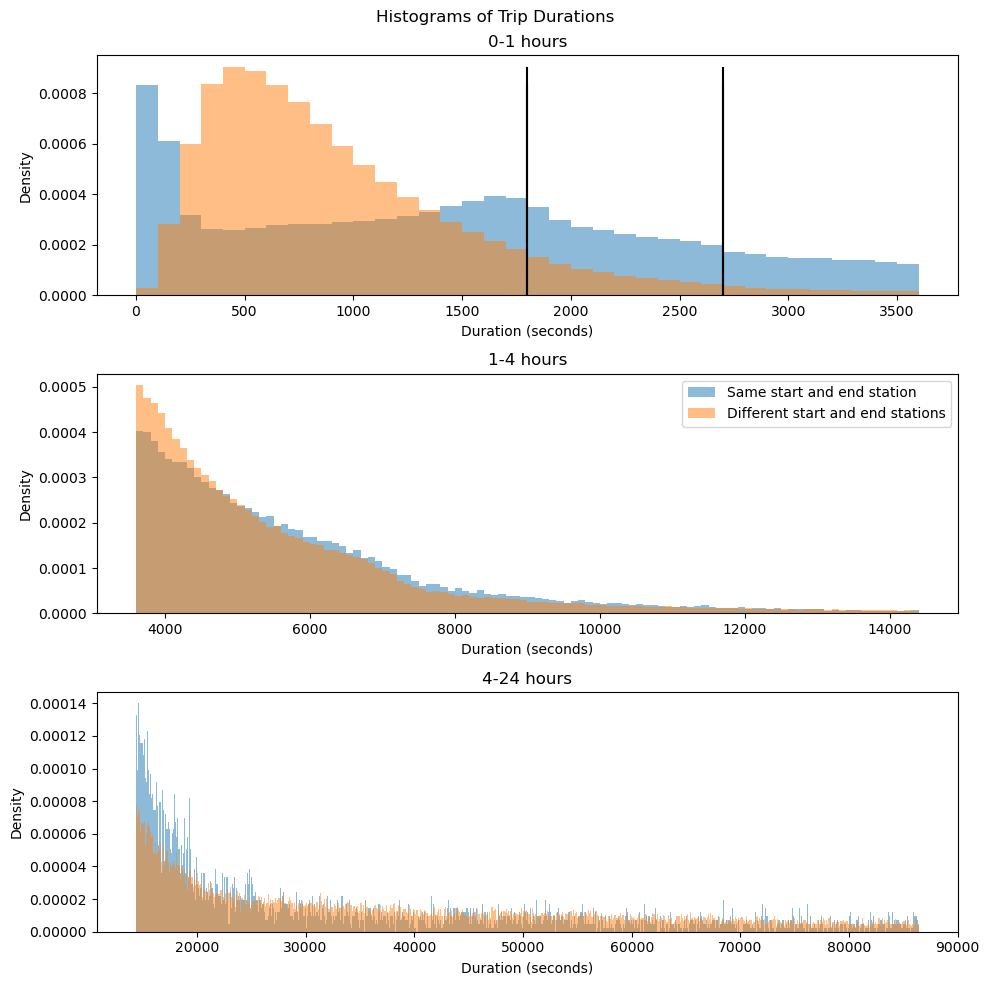

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs = axs.ravel()
plt.sca(axs[0])
hist_between(show=False, alpha=0.5)
hist_between(different_start_and_end, show=False, alpha=0.5)
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.annotate('30 min', [1850, 0.001])
plt.annotate('45 min', [2750, 0.001])
plt.title('0-1 hours')

plt.sca(axs[1])
hist_between(lower=3600, upper=14400, plot_vlines=False, show=False, alpha=0.5)
hist_between(different_start_and_end, 3600, 14400, plot_vlines=False, show=False, alpha=0.5)
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.legend()
plt.title('1-4 hours')

plt.sca(axs[2])
hist_between(lower=14400, upper=86400, plot_vlines=False, show=False, alpha=0.5)
hist_between(different_start_and_end, 14400, 86400, plot_vlines=False, show=False, alpha=0.5)
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.title('4-24 hours')

plt.suptitle('Histograms of Trip Durations')
plt.tight_layout()
plt.show()

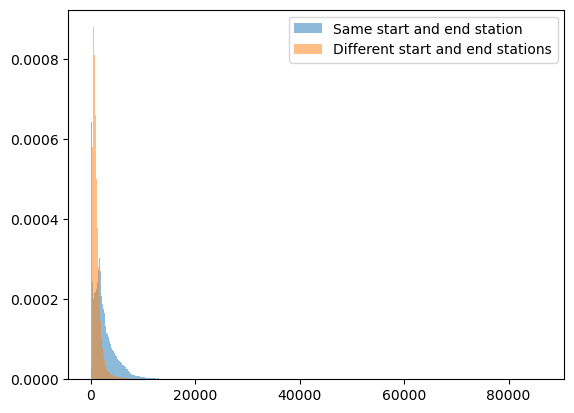

In [18]:
hist_between(upper=86400, plot_vlines=False, show=False, alpha=0.5)
hist_between(different_start_and_end, upper=86400, plot_vlines=False, show=False, alpha=0.5)
plt.legend()
plt.show()

In [19]:
same_start_and_end_trimmed = same_start_and_end.loc[(300 <= same_start_and_end['duration']) & (same_start_and_end['duration'] <= 28800)]

add up number of trips started at a station and number of trips ended at a station

trips starting and ending at the same station count twice

In [39]:
stations = pd.read_csv('data/raw/current_bluebikes_stations_boston.csv').drop(columns=['Unnamed: 0'])

In [21]:
both_counts = same_start_and_end_trimmed['start_station_name'].value_counts()
start_only_counts = different_start_and_end['start_station_name'].value_counts()
end_only_counts = different_start_and_end['end_station_name'].value_counts()

In [40]:
stations['roundtrip_ratio'] = stations['Name'].apply(
    lambda n: 2 * both_counts[n] / (start_only_counts[n] + end_only_counts[n] + 2 * both_counts[n])
)
stations['trips'] = stations['Name'].apply(lambda n: start_only_counts[n] + end_only_counts[n] + 2 * both_counts[n])
stations['log_trips'] = np.log10(stations['trips'])
stations

,Number,Name,Latitude,Longitude,Public,Total docks,roundtrip_ratio,trips,log_trips
0,A32019,175 N Harvard St,42.364475,-71.128408,Yes,17,0.041054,175088,5.243256
1,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Yes,17,0.329957,691,2.839478
2,C32106,555 Metropolitan Ave,42.268100,-71.119240,Yes,18,0.275449,334,2.523746
3,C32105,606 American Legion Hwy at Canterbury St,42.285780,-71.109725,Yes,18,0.075178,1543,3.188366
4,C32091,645 Summer St,42.341781,-71.039870,Yes,19,0.027830,17032,4.231266
...,...,...,...,...,...,...,...,...,...
208,C32034,Watermark Seaport - Boston Wharf Rd at Seaport...,42.351586,-71.045693,Yes,15,0.026880,161461,5.208068
209,B32021,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,Yes,12,0.049047,89669,4.952642
210,D32022,West End Park,42.365908,-71.064467,Yes,35,0.015364,41526,4.618320
211,B32059,Whittier St Health Center,42.332863,-71.092189,Yes,19,0.017747,12284,4.089340


In [41]:
fig = px.scatter_mapbox(stations, lat='Latitude', lon='Longitude',
                        size='roundtrip_ratio', color='log_trips',
                        hover_name='Name', hover_data=['trips'])
fig.show()